In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Supongamos que 'data' es el DataFrame cargado con las columnas descritas
data=pd.read_csv('dataset_limpio_parte1.csv')
data1=pd.read_csv('dataset_limpio_parte2.csv')
data2=pd.read_csv('dataset_limpio_parte3.csv')
data_unida=pd.concat([data,data1,data2]) # Ajusta el nombre del archivo según corresponda
data_unida.head()

C:\Users\Alfon\AppData\Local\Temp\ipykernel_8884\812379352.py:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('dataset_limpio_parte1.csv')
C:\Users\Alfon\AppData\Local\Temp\ipykernel_8884\812379352.py:3: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('dataset_limpio_parte2.csv')
C:\Users\Alfon\AppData\Local\Temp\ipykernel_8884\812379352.py:4: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv('dataset_limpio_parte3.csv')


,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,5514,2016-04-28,ES,H,44,2016-04-29,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,5541,2016-04-28,ES,H,60,2016-04-29,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,5631,2016-04-28,ES,V,53,2016-04-28,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
3,5656,2016-04-28,ES,H,47,2016-04-28,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
4,5738,2016-04-28,ES,V,48,2016-04-28,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0


In [3]:
data_unida.isna().sum()

cod_persona               0
mes                       0
pais                      0
sexo                      0
edad                      0
fecha1                   56
xti_empleado             56
xti_nuevo_cliente        56
num_antiguedad            0
xti_rel                  56
tip_rel_1mes              0
indresi                  56
indext                   56
des_canal                56
xti_extra                56
tip_dom                  56
cod_provincia             0
xti_actividad_cliente    56
imp_renta                 0
id_segmento               0
mean_engagement           0
ind_prod1                 0
ind_prod2                 0
ind_prod3                 0
ind_prod4                 0
ind_prod5                 0
ind_prod6                 0
ind_prod7                 0
ind_prod8                 0
ind_prod9                 0
ind_prod10                0
ind_prod11                0
ind_prod12                0
ind_prod13                0
ind_prod14                0
ind_prod15          

In [4]:
#Separamos las variables en categóricas y numéricas
cat=[]
num=[]
for i in data_unida.columns:
  if data_unida[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['mes', 'pais', 'sexo', 'edad', 'fecha1', 'xti_empleado', 'num_antiguedad', 'tip_rel_1mes', 'indresi', 'indext', 'des_canal', 'xti_extra', 'id_segmento']
num =  ['cod_persona', 'xti_nuevo_cliente', 'xti_rel', 'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25']


In [5]:
import matplotlib.pyplot as plt


Descripcion de la variable  mes
--------------------------------------------------
Categorías:
mes
2016-04-28    46776
2016-03-28    46549
2016-02-28    46287
2016-01-28    45994
2015-12-28    45675
2015-11-28    45309
2015-10-28    44574
2015-09-28    43170
2015-08-28    42016
2015-07-28    41342
2015-06-28    31429
2015-05-28    31336
2015-04-28    31250
2015-03-28    31138
2015-02-28    30988
2015-01-28    30849
Name: count, dtype: int64
Número de categorias:  16


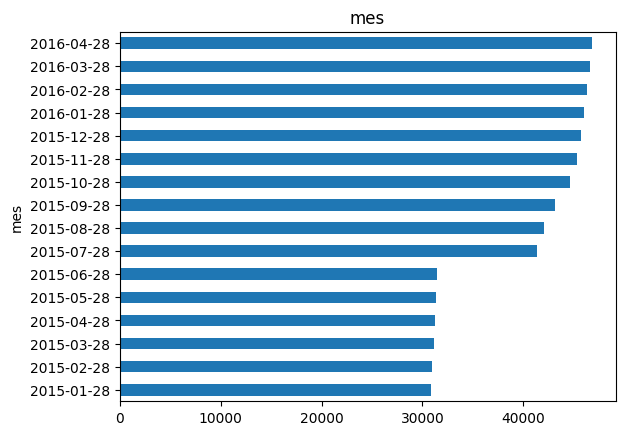


Descripcion de la variable  pais
--------------------------------------------------
Categorías:
pais
ES    631792
DE       285
GB       244
FR       224
US       203
CH       192
CO       160
AR       144
IT       138
MX       122
RO       104
EC        90
VE        80
CL        74
PY        74
BE        64
BR        52
AT        48
CA        48
NL        32
CN        32
PL        32
FI        32
BG        32
PE        32
BO        26
CU        16
UA        16
GE        16
PA        16
NG        16
NZ        16
JP        16
AD        16
SE        16
GN        16
IL        16
SA        16
PR        16
PK        16
GT        16
PT        16
SV        16
IN        16
AU        11
RU        10
MD        10
HU         7
Name: count, dtype: int64
Número de categorias:  48


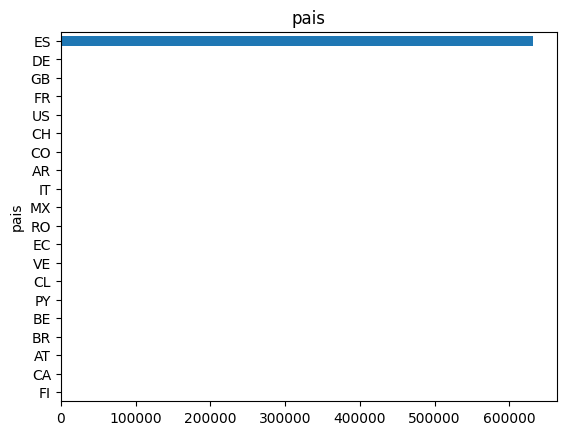


Descripcion de la variable  sexo
--------------------------------------------------
Categorías:
sexo
V    346910
H    287772
Name: count, dtype: int64
Número de categorias:  2


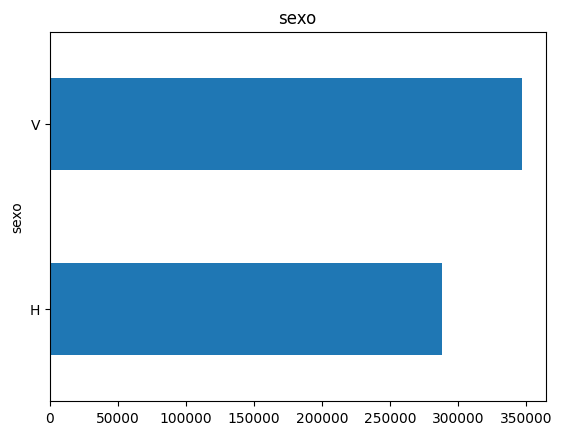


Descripcion de la variable  edad
--------------------------------------------------
Categorías:
edad
23     28375
24     27347
22     22087
25     16441
20     16441
       ...  
108        8
104        7
106        6
  4        6
105        4
Name: count, Length: 312, dtype: int64
Número de categorias:  312


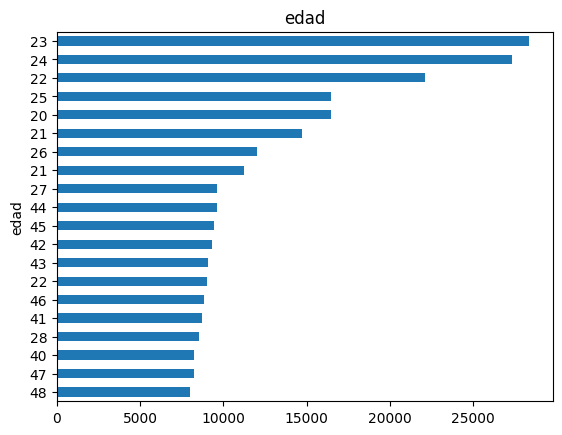


Descripcion de la variable  fecha1
--------------------------------------------------
Categorías:
fecha1
2014-10-03    2907
2014-07-28    2516
2014-08-04    2385
2013-10-14    2046
2012-08-03    1443
              ... 
2016-03-19       2
2008-06-07       2
2016-04-17       1
2016-04-16       1
2016-04-09       1
Name: count, Length: 5796, dtype: int64
Número de categorias:  5796


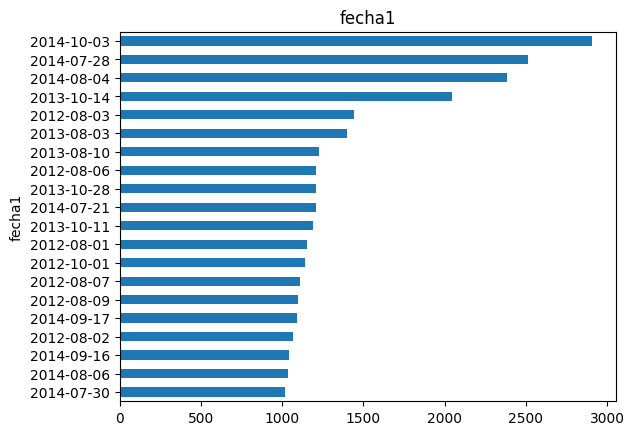


Descripcion de la variable  xti_empleado
--------------------------------------------------
Categorías:
xti_empleado
N    634158
A       202
B       170
F        96
Name: count, dtype: int64
Número de categorias:  4


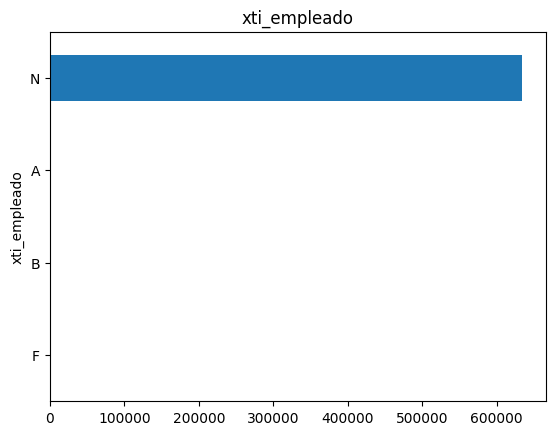


Descripcion de la variable  num_antiguedad
--------------------------------------------------
Categorías:
num_antiguedad
21         7884
33         7025
45         6901
10         6705
35         6591
           ... 
248           2
      1       1
250           1
251           1
252           1
Name: count, Length: 748, dtype: int64
Número de categorias:  748


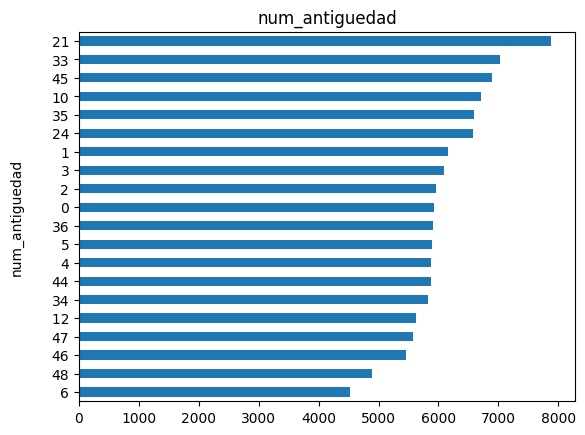


Descripcion de la variable  tip_rel_1mes
--------------------------------------------------
Categorías:
tip_rel_1mes
I    340711
A    288119
N      5642
P       171
R        39
Name: count, dtype: int64
Número de categorias:  5


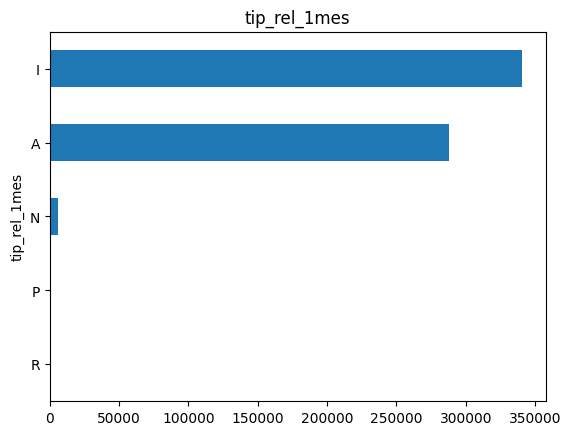


Descripcion de la variable  indresi
--------------------------------------------------
Categorías:
indresi
S    631736
N      2890
Name: count, dtype: int64
Número de categorias:  2


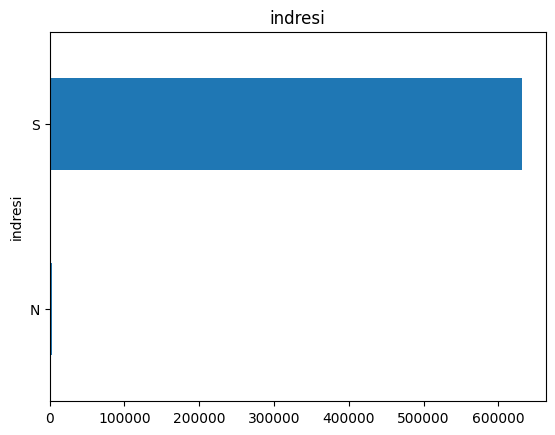


Descripcion de la variable  indext
--------------------------------------------------
Categorías:
indext
N    604219
S     30407
Name: count, dtype: int64
Número de categorias:  2


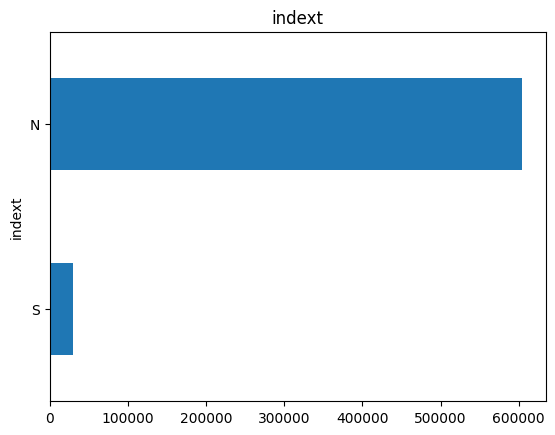


Descripcion de la variable  des_canal
--------------------------------------------------
Categorías:
des_canal
KHE    197326
KAT    152054
KFC    147669
KHQ     25773
KFA     18941
        ...  
KCP        10
KDV        10
KFM        10
K00        10
KCO        10
Name: count, Length: 126, dtype: int64
Número de categorias:  126


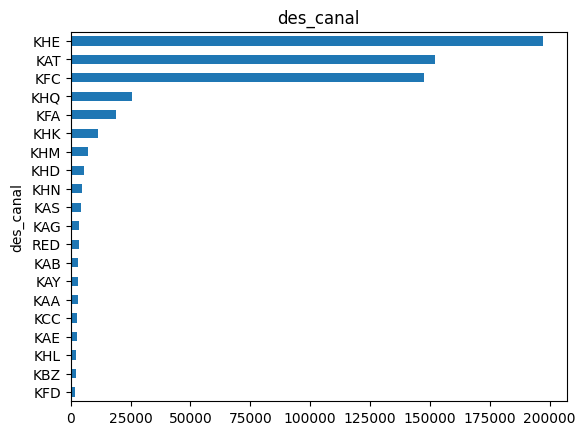


Descripcion de la variable  xti_extra
--------------------------------------------------
Categorías:
xti_extra
N    633108
S      1518
Name: count, dtype: int64
Número de categorias:  2


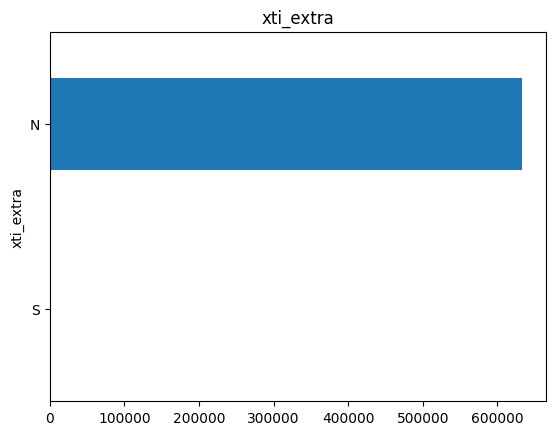


Descripcion de la variable  id_segmento
--------------------------------------------------
Categorías:
id_segmento
02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
04-NO TIENE             7403
Name: count, dtype: int64
Número de categorias:  4


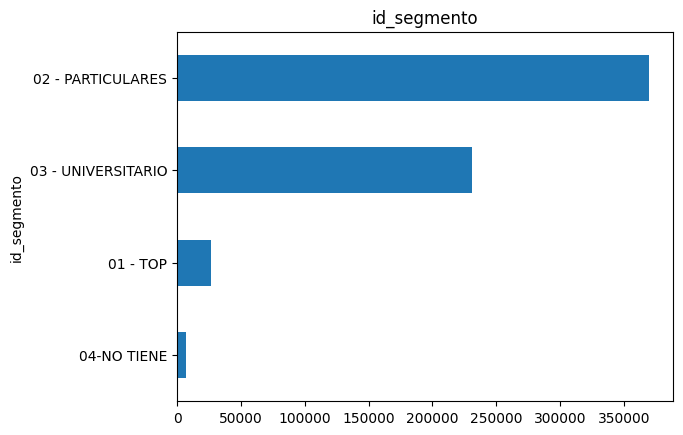

In [6]:
#Visualización variables categóricas
for c in cat:
    print('\nDescripcion de la variable ',c)
    print('-'*50)
    print('Categorías:')
    print(data_unida[c].value_counts())
    print('Número de categorias: ',data_unida[c].nunique())
    data_unida[c].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
    plt.title(c)
    plt.show()

In [7]:
fechas = [
    '2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', 
    '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
    '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
    '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28'
]

mapeo = {fecha: idx+1 for idx, fecha in enumerate(fechas)}

# Reemplazar los valores de la columna 'mes'
data_unida['mes'] = data_unida['mes'].map(mapeo)

In [8]:
# 1 si es 'ES' 0 si es cualquier otro país
data_unida['pais'] = data_unida['pais'].apply(lambda x: 1 if x == 'ES' else 0)

In [9]:
# 1 si es 'V' 0 si es 'H'
data_unida['sexo'] = data_unida['sexo'].apply(lambda x: 1 if x == 'V' else 0)

In [10]:
data_unida['edad'].unique()

array([44, 60, 53, 47, 48, 22, 25, 36, 21, 28, 43, 65, 30, 40, 39, 35, 38,
       27, 24, 32, 31, 26, 42, 33, 52, 59, 57, 56, 37, 17, 73, 67, 29, 46,
       66, 77, 5, 51, 88, 45, 49, 41, 70, 71, 50, 2, 54, 63, 15, 69, 62,
       23, 64, 58, 34, 20, 75, 90, 74, 3, 16, 8, 7, 61, 14, 72, 13, 84,
       55, 9, 68, 10, 18, 19, 80, 83, 86, 6, 99, 100, 89, 78, 85, 94, 95,
       79, 82, 4, 11, 12, 87, 81, 76, 93, '28', ' 38', '38', ' 54', '54',
       '55', ' 31', '31', ' 37', '37', '27', '24', '25', ' 39', '39',
       '40', ' 40', ' 45', '45', '46', ' 43', '43', '44', ' NA', '22',
       '23', '32', ' 34', '34', '35', ' 27', ' 42', '42', ' 49', '49',
       '50', '36', ' 56', '56', ' 28', '29', ' 55', ' 35', '26', ' 25',
       ' 32', '33', ' 13', '13', '14', ' 30', '30', ' 29', ' 23', '51',
       ' 33', '70', ' 48', '48', ' 67', '67', '68', ' 66', '66', '63',
       '64', ' 21', '21', '58', '59', '62', ' 41', '41', '20', '72', '73',
       ' 46', ' 47', '47', ' 26', ' 36', ' 50', ' 60', 

In [11]:
#Limpieza de la variable edad
mediana=data_unida[(data_unida['edad'] !='NA') & (data_unida['edad']!=' NA')]['edad'].astype(int).median()
data_unida['edad']=data_unida['edad'].apply(lambda x: x if x not in ['NA',' NA'] else f'{mediana}')
data_unida['edad']=data_unida['edad'].astype(float)

In [12]:
data_unida['edad'].unique()

array([ 44.,  60.,  53.,  47.,  48.,  22.,  25.,  36.,  21.,  28.,  43.,
        65.,  30.,  40.,  39.,  35.,  38.,  27.,  24.,  32.,  31.,  26.,
        42.,  33.,  52.,  59.,  57.,  56.,  37.,  17.,  73.,  67.,  29.,
        46.,  66.,  77.,   5.,  51.,  88.,  45.,  49.,  41.,  70.,  71.,
        50.,   2.,  54.,  63.,  15.,  69.,  62.,  23.,  64.,  58.,  34.,
        20.,  75.,  90.,  74.,   3.,  16.,   8.,   7.,  61.,  14.,  72.,
        13.,  84.,  55.,   9.,  68.,  10.,  18.,  19.,  80.,  83.,  86.,
         6.,  99., 100.,  89.,  78.,  85.,  94.,  95.,  79.,  82.,   4.,
        11.,  12.,  87.,  81.,  76.,  93.,  97.,  98.,  91.,  92., 101.,
        96., 102., 103., 104., 107., 108., 105., 106., 109., 110., 117.])

In [13]:
#Transformamos las fechas a enteros
data_unida['fecha1'] = pd.to_datetime(data_unida['fecha1'])
data_unida = data_unida.sort_values('fecha1')
data_unida['fecha_num'] = range(1, len(data_unida) + 1)

In [14]:
data_unida['num_antiguedad'].unique()

array(['254', '252', '251', '250', '249', '248', '246', '    246', '255',
       '253', '247', '245', '    245', '    241', '241', '242', '243',
       '244', '    244', '    243', '233', '237', '234', '235', '236',
       '    229', '238', '232', '229', '230', '231', '    210', '218',
       '     33', '33', '34', '219', '36', '37', '38', '39', '40', '41',
       '35', '42', '217', '216', '215', '214', '212', '213', '210', '211',
       '    242', '151', '155', '154', '153', '152', '150', '    146',
       '148', '147', '146', '149', '156', '157', '    148', '170', '239',
       '171', '240', '169', '168', '167', '166', '165', '164', '    164',
       '172', '173', '    159', '159', '161', '162', '163', '160',
       '     79', '83', '84', '79', '80', '81', '82', '85', '86', '87',
       '88', '    173', '181', '180', '179', '178', '177', '176', '175',
       '182', '174', '    240', '94', '93', '92', '91', '90', '89', '97',
       '96', '95', '185', '184', '186', '187', '189', '190',

In [15]:
#Limpieza de la variable 'num_antiguedad'
mediana_ant=data_unida[(data_unida['num_antiguedad'].str.strip() !='NA') & (data_unida['num_antiguedad']!=' NA')]['num_antiguedad'].astype(int).median()
data_unida['num_antiguedad']=data_unida['num_antiguedad'].apply(lambda x: x if x not in ['NA','     NA'] else f'{mediana_ant}')
data_unida['num_antiguedad']=data_unida['num_antiguedad'].astype(float)

In [16]:
data_unida['num_antiguedad'].unique()

array([254., 252., 251., 250., 249., 248., 246., 255., 253., 247., 245.,
       241., 242., 243., 244., 233., 237., 234., 235., 236., 229., 238.,
       232., 230., 231., 210., 218.,  33.,  34., 219.,  36.,  37.,  38.,
        39.,  40.,  41.,  35.,  42., 217., 216., 215., 214., 212., 213.,
       211., 151., 155., 154., 153., 152., 150., 146., 148., 147., 149.,
       156., 157., 170., 239., 171., 240., 169., 168., 167., 166., 165.,
       164., 172., 173., 159., 161., 162., 163., 160.,  79.,  83.,  84.,
        80.,  81.,  82.,  85.,  86.,  87.,  88., 181., 180., 179., 178.,
       177., 176., 175., 182., 174.,  94.,  93.,  92.,  91.,  90.,  89.,
        97.,  96.,  95., 185., 184., 186., 187., 189., 190., 191., 192.,
       188., 183., 221., 224., 226., 227., 228., 223., 225., 222., 197.,
       198., 199., 200., 204., 202., 203., 205., 201., 196., 220.,  47.,
        53.,  48.,  51.,  52.,  50.,  55.,  54.,  49.,  56.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  1

In [17]:
# 1 si es 'S' 0 si es 'N'. Variable 'indresi'
data_unida['indresi'] = data_unida['indresi'].apply(lambda x: 1 if x == 'S' else 0)

In [18]:
# 1 si es 'S' 0 si es 'N'. Variable 'indext'
data_unida['indext'] = data_unida['indext'].apply(lambda x: 1 if x == 'S' else 0)

In [19]:
# 1 si es 'S' 0 si es 'N'. Variable 'xti_extra'
data_unida['xti_extra'] = data_unida['xti_extra'].apply(lambda x: 1 if x == 'S' else 0)

In [20]:
columnas_dummy= ['xti_empleado', 'tip_rel_1mes', 'id_segmento']
for columna in columnas_dummy:
    dummys = pd.get_dummies(data_unida[columna], prefix=columna, prefix_sep='_')
    data_unida = pd.concat([data_unida, dummys], axis=1)

# Eliminar las columnas originales
data_unida = data_unida.drop(columnas_dummy, axis=1)

In [21]:
#Labelencoder de la variable 'des_canal'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_unida['des_canal'] = label_encoder.fit_transform(data_unida['des_canal'])


In [22]:
#Separamos las variables en categóricas y numéricas
cat=[]
num=[]
for i in data_unida.columns:
  if data_unida[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  []
num =  ['cod_persona', 'mes', 'pais', 'sexo', 'edad', 'fecha1', 'xti_nuevo_cliente', 'num_antiguedad', 'xti_rel', 'indresi', 'indext', 'des_canal', 'xti_extra', 'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25', 'fecha_num', 'xti_empleado_A', 'xti_empleado_B', 'xti_empleado_F', 'xti_empleado_N', 'tip_rel_1mes_A', 'tip_rel_1mes_I', 'tip_rel_1mes_N', 'tip_rel_1mes_P', 'tip_rel_1mes_R', 'id_segmento_01 - TOP', 'id_segmento_02 - PARTICULARES', 'id_segmento_03 - UNIVERSITARIO', 'id_segmento_04-NO TIENE']


In [24]:
data_unida

,cod_persona,mes,pais,sexo,edad,fecha1,xti_nuevo_cliente,num_antiguedad,xti_rel,indresi,...,xti_empleado_N,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_N,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,id_segmento_04-NO TIENE
211559,1537800,16,1,1,56.0,1995-01-16,0.0,254.0,1.0,1,...,False,True,False,False,False,False,True,False,False,False
211524,1537717,13,1,1,66.0,1995-01-16,0.0,252.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
211523,1537717,12,1,1,66.0,1995-01-16,0.0,251.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
211522,1537717,11,1,1,66.0,1995-01-16,0.0,250.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
211521,1537717,10,1,1,66.0,1995-01-16,0.0,249.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157767,1390588,3,1,1,39.0,NaT,NaN,50.0,NaN,0,...,False,False,False,True,False,False,False,False,False,True
157768,1390588,4,1,1,39.0,NaT,NaN,50.0,NaN,0,...,False,False,False,True,False,False,False,False,False,True
198819,1500541,1,1,1,39.0,NaT,NaN,50.0,NaN,0,...,False,False,False,True,False,False,False,False,False,True
198820,1500541,2,1,1,39.0,NaT,NaN,50.0,NaN,0,...,False,False,False,True,False,False,False,False,False,True
